In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [8]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [9]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [10]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\ratho\AppData\Local\Temp\ipykernel_26524\3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C

In [11]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([ 1.  , 26.  , 26.  , 24.  , 40.  , 18.  ,  7.  , 36.  ,  9.  ,
       15.  , 42.  , 31.  , 24.  , 27.  , 25.  , 24.  , 21.  , 28.5 ,
       22.  , 43.  , 28.5 , 36.  , 30.  , 24.  , 47.  , 16.  , 36.  ,
       43.  , 45.  , 32.  , 64.  , 71.  , 60.  , 33.  , 21.  , 36.  ,
        0.42, 29.  , 11.  , 58.  , 56.  , 22.  , 30.  , 29.  , 54.  ,
       27.  , 27.  , 26.  , 47.  , 28.  , 20.  , 16.  , 25.  , 31.  ,
       27.  , 52.  ,  2.  , 22.  , 16.  , 40.  , 22.  , 47.  , 26.  ,
       40.  , 32.  ,  9.  ,  2.  , 33.  , 35.  , 28.  , 32.  , 59.  ,
       41.  , 18.  , 23.  , 48.  , 29.  , 49.  , 18.  , 23.  ,  2.  ,
       28.  , 51.  , 24.  , 47.  , 27.  , 54.  ,  2.  , 21.  , 33.  ,
        4.  , 46.  , 25.  , 24.  , 35.  , 25.  , 15.  , 16.  , 48.  ,
       35.  , 31.  , 25.  , 21.  , 42.  , 37.  , 32.5 , 47.  ,  3.  ,
       30.  , 19.  , 28.  , 40.  , 39.  , 19.  , 33.  , 66.  , 28.  ,
       37.  , 21.  , 26.  , 24.  , 57.  , 16.  , 36.  , 65.  , 27.  ,
       21.  , 30.  ,

In [12]:
X_train['Age'].isnull().sum()

np.int64(148)

In [13]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.00
10,4.0,16.7000,4.00
873,47.0,9.0000,47.00
182,9.0,31.3875,9.00
876,20.0,9.8458,20.00
...,...,...,...
534,30.0,8.6625,30.00
584,NaN,8.7125,23.50
493,71.0,49.5042,71.00
527,NaN,221.7792,0.83


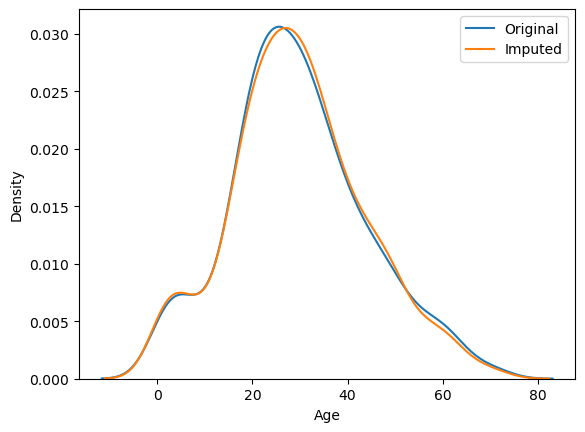

In [14]:
sns.kdeplot(X_train['Age'], label='Original', fill=False)
sns.kdeplot(X_train['Age_imputed'], label='Imputed', fill=False)

plt.legend()
plt.show()

In [15]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  199.40472214478737


In [16]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,49.715510
Age,71.512440,204.349513,204.349513
Age_imputed,49.715510,204.349513,199.404722


<Axes: >

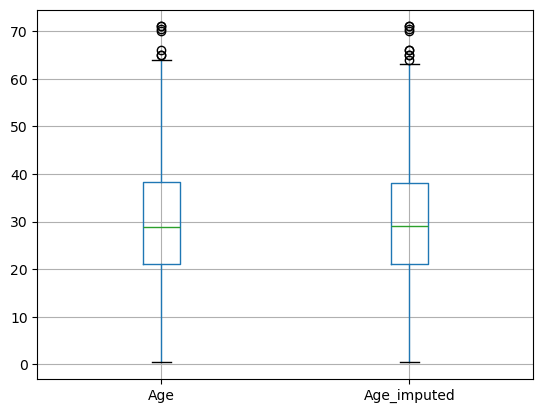

In [17]:
X_train[['Age', 'Age_imputed']].boxplot()

In [18]:
# this is occuring some issue , to give a random state lke this we cant just write like this ...will look sometime late 
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(X_train['Fare']))

In [19]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [20]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [21]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [22]:
X = data
y = data['SalePrice']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [25]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1188,NaN,TA,195000,TA,NaN
269,Fa,TA,148000,TA,Fa
1162,Po,TA,129000,TA,Po
1118,NaN,TA,140000,TA,NaN
710,NaN,NaN,52000,NaN,NaN


In [26]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\ratho\AppData\Local\Temp\ipykernel_26524\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual

In [27]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [28]:
temp

,original,imputed
TA,0.951043,0.952911
Fa,0.037171,0.035103
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [29]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.494007
TA,0.412439,0.415240
Fa,0.040917,0.041096
Po,0.027823,0.025685
Ex,0.024550,0.023973


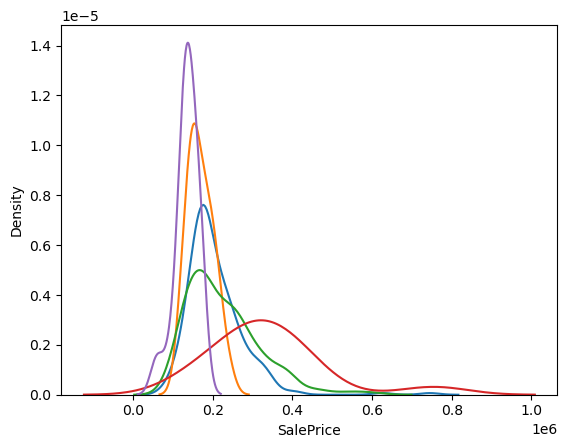

In [30]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(
        data=X_train[X_train['FireplaceQu'] == category],
        x="SalePrice",
        label=category,
        fill=False  # set True for shaded KDE curves
    )

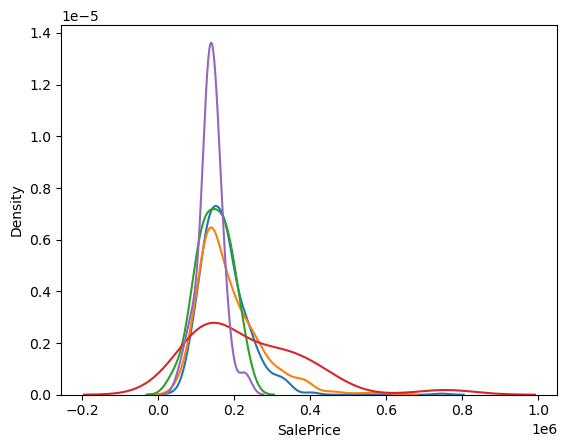

In [31]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(
        data=X_train[X_train['FireplaceQu_imputed'] == category],
        x="SalePrice",
        label=category,
        fill=False  # set True if you want shaded KDEs
    )